In [44]:
# David Avallone & Kelly Reynolds Computer Vision

import cv2 
from matplotlib import pyplot as plt
import math
import numpy as np
import os

In [72]:
centroid = (0,0)
# Holds the iris' radius
radius = 0
# Holds the current element of the image used by the getNewEye function
currentEye = 0
# Holds the list of eyes (filenames)
eyesList = []

def getNewEye(list):
	global currentEye
	if (currentEye >= len(list)):
		currentEye = 0
	newEye = list[currentEye]
	currentEye += 1
	return (newEye)

def getCircles(image):
    i = 80
    while i < 151:
        circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=2, minDist=100.0,
                                   param1=30, param2=i, minRadius=100, maxRadius=140)
        if circles is not None and len(circles) == 1:
            return circles[0]
        i += 1
    return []

# this code was the original inspiration for the below function but did not work.

# def getPupil(frame):
#     # pupilImg = np.zeros_like(frame)
#     pupilImg = cv2.UMat(frame)
#     cv2.inRange(frame, (30,30,30), (80,80,80), pupilImg)
#     pupilImg = cv2.cvtColor(pupilImg, cv2.COLOR_BGR2GRAY)
#     contours, _ = cv2.findContours(pupilImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     del pupilImg
#     pupilImg = frame.copy()
#     for contour in contours:
#         moments = cv2.moments(contour)
#         area = moments['m00']
#         if (area > 50):
#             pupilArea = area
#             x = moments['m10'] / area
#             y = moments['m01'] / area
#             pupil = contour
#             centroid = (int(x), int(y))
#             cv2.drawContours(pupilImg, [pupil], -1, (0, 0, 0), 2)
#             break
#     return pupilImg

def getPupil(frame):
    # Convert frame to UMat
    frame = cv2.UMat(frame)
    
    # Thresholding
    pupilImg = cv2.inRange(frame, (30,30,30), (80,80,80))
    
    # Find contours
    contours, _ = cv2.findContours(pupilImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convert UMat to numpy array for copying
    frame = cv2.UMat.get(frame)
    
    # Draw circle around pupil
    pupilImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    pupilImg = cv2.cvtColor(pupilImg, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        moments = cv2.moments(contour)
        area = moments['m00']
        if (area > 50):
            x = int(moments['m10'] / area)
            y = int(moments['m01'] / area)
            radius = int(np.sqrt(area / np.pi))
            cv2.circle(pupilImg, (x, y), radius, (0, 0, 0), cv2.FILLED)
            break

    return pupilImg


def getIris(frame):
    iris = []
    copyImg = frame.copy()
    resImg = frame.copy()
    grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(frame)
    grayImg = cv2.Canny(grayImg, 5, 70)
    grayImg = cv2.GaussianBlur(grayImg, (7, 7), 0)
    circles = getCircles(grayImg)
    iris.append(resImg)
    if circles is not None:
        for circle in circles:
            rad = int(circle[2])
            global centroid
            centroid = (int(circle[0]), int(circle[1]))
            cv2.circle(mask, centroid, rad, (255, 255, 255), -1)
            mask = cv2.bitwise_not(mask)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to single-channel
            cv2.subtract(frame, copyImg, resImg, mask)
            x = int(centroid[0] - rad)
            y = int(centroid[1] - rad)
            w = int(rad * 2)
            h = w
            resImgROI = resImg[y:y+h, x:x+w]
            return resImgROI
    return resImg

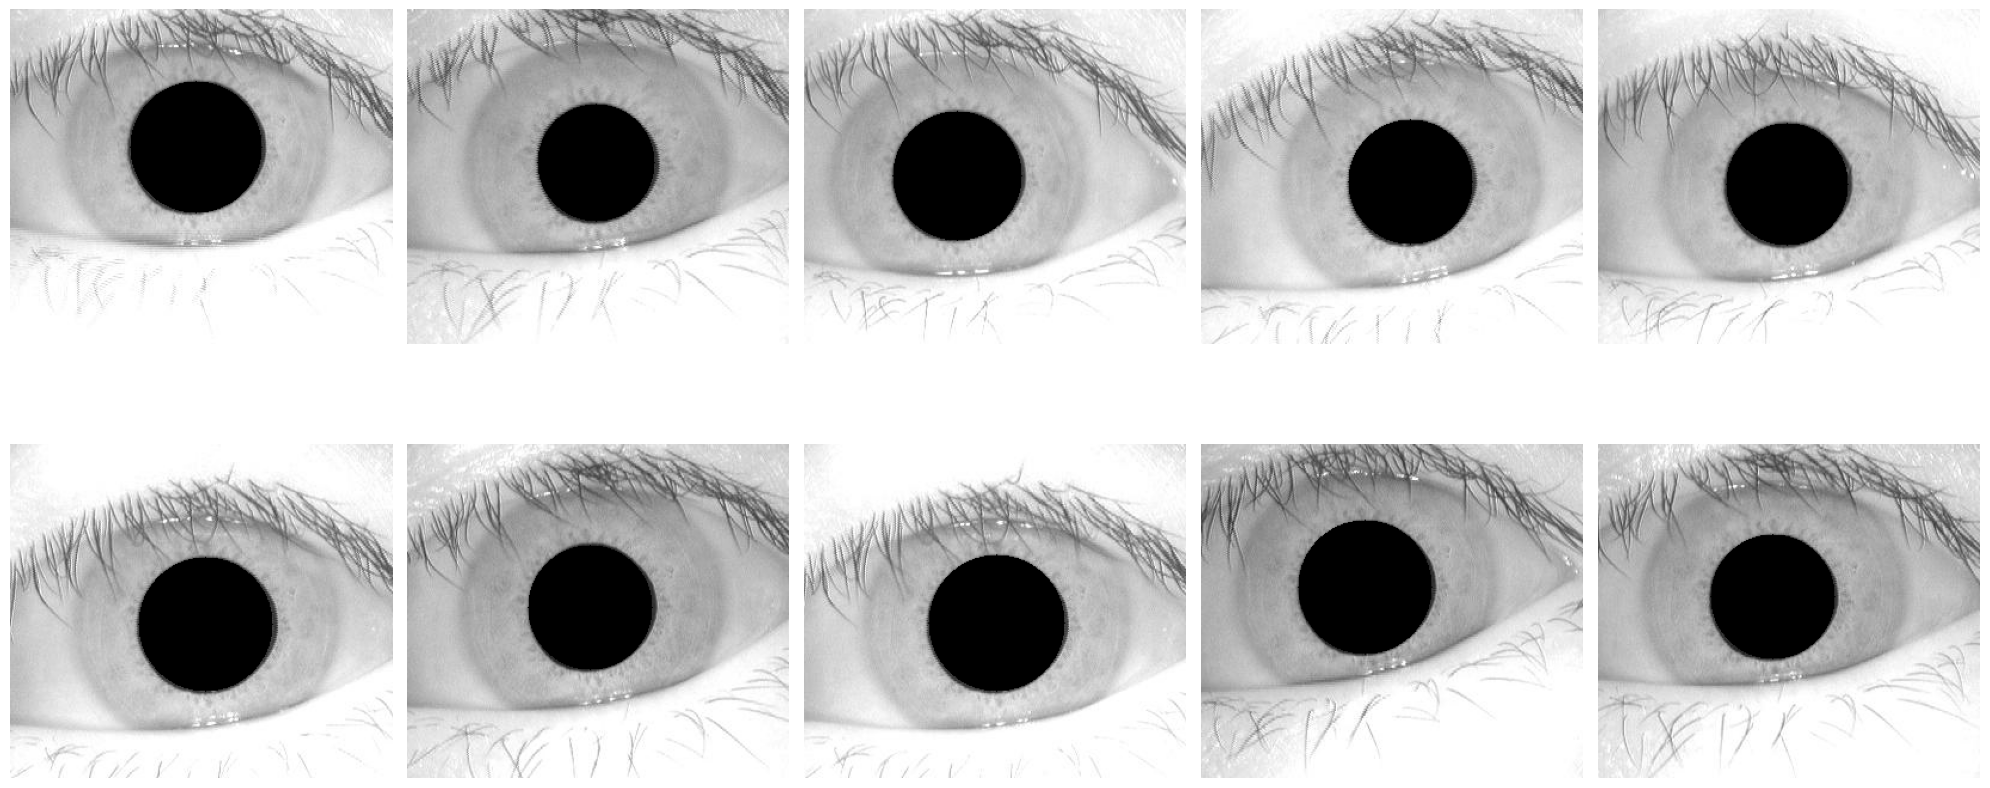

In [75]:
# Path to the directory containing the images
directory = 'CASIA-Iris-Interval/001/L/'

# Get a list of all files in the directory
eyesList = os.listdir(directory)

# Create a figure to plot the images
plt.figure(figsize=(20, 10))

# Loop through each file in the directory
for i in range(len(eyesList)-1):
    eye = getNewEye(eyesList)
    frame = cv2.imread("CASIA-Iris-Interval/001/L/"+eye)
    
    # Get the pupil and iris
    output = getPupil(frame)
    iris = getIris(output)
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(output)
    plt.axis("off")

plt.tight_layout()
plt.show()

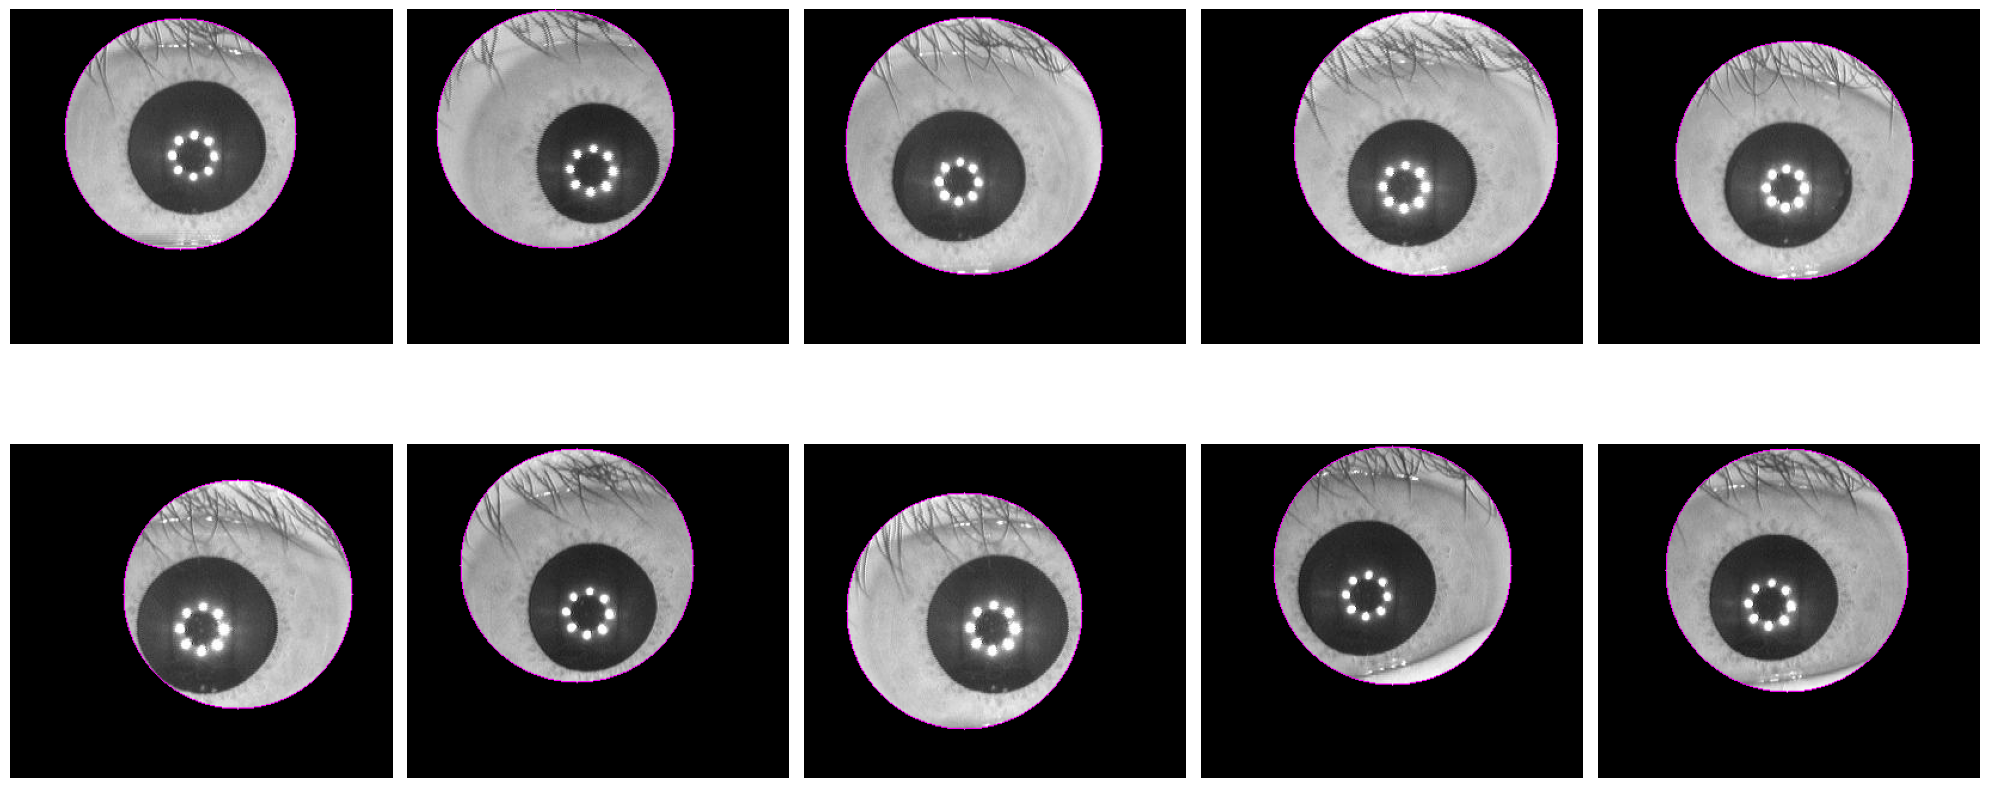

In [ ]:
# This is a test run but the images are not as good as the above method.

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    detected_circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=50, minRadius=10, maxRadius=115)

    mask = np.zeros_like(img)
    white_color = (255, 255, 255)
    line_color = (255, 0, 255)
    filled_circle = -1
    line_thickness = 1

    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        max_radius_index = np.argmax(detected_circles[0, :, 2])
        a, b, r = detected_circles[0, max_radius_index]

        cv2.circle(img, (a, b), r, line_color, line_thickness)
        mask = cv2.circle(mask, (a, b), r, white_color, filled_circle)

        result = cv2.bitwise_and(img, mask)

        return result
    else:
        return None

# Paths to the ten images
image_paths = [
    "CASIA-Iris-Interval/001/L/S1001L01.jpg","CASIA-Iris-Interval/001/L/S1001L02.jpg","CASIA-Iris-Interval/001/L/S1001L03.jpg",
    "CASIA-Iris-Interval/001/L/S1001L04.jpg","CASIA-Iris-Interval/001/L/S1001L05.jpg","CASIA-Iris-Interval/001/L/S1001L06.jpg",
    "CASIA-Iris-Interval/001/L/S1001L07.jpg","CASIA-Iris-Interval/001/L/S1001L08.jpg","CASIA-Iris-Interval/001/L/S1001L09.jpg",
    "CASIA-Iris-Interval/001/L/S1001L10.jpg",
    # Add paths to the other nine images here
]

# Process each image and store the results
results = [process_image(image_path) for image_path in image_paths]

# Display the results
plt.figure(figsize=(20, 10))
for i, result in enumerate(results):
    plt.subplot(2, 5, i + 1)
    if result is not None:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    else:
        plt.title("Nothing Detected")
    plt.axis("off")

plt.tight_layout()
plt.show()